Использование на практике методов снижения размерности  
Использование алгоритмов понижения размерности для улучшения классификации новостей (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html)

Цель задания: Исследовать влияние различных методов понижения размерности на качество классификации текстовых данных.

Датасет: Набор данных новостных статей
(датасет '20 Newsgroups' доступный в sklearn.datasets).

Задачи:

1. Загрузите датасет '20 Newsgroups' из sklearn.  

2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).  

3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:  
— PCA (Principal Component Analysis)  
— t-SNE (t-distributed Stochastic Neighbor Embedding)  
— UMAP (Uniform Manifold Approximation and Projection).  

4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.  

5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.  

6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.  

7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.

1. Загрузите датасет '20 Newsgroups' из sklearn.

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Загрузим данные без метаинформации
# Для учебных целей, чтобы визуализация разделения категорий была бы более наглядной, ограничим набор тем.
categories = ['comp.graphics',
    'comp.os.ms-windows.misc',
    'comp.sys.mac.hardware',
    'comp.windows.x']
data = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), categories=categories)

In [3]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Датасет состоит из одного признака, представляющей собой отдельное новостное сообщение, хранящиеся в словаре data с ключом "data" и целевой переменной, хранящейся в словаре data с ключом target
# отобразим случайное значение признака
rand_frature = int(np.random.rand() * len(data.data))
data.data[rand_frature].split('\n')

['There is a new version of the RTrace ray-tracing package (8.2.0) at',
 'asterix.inescn.pt [192.35.246.17] in directory pub/RTrace.',
 'Check the README file.',
 '',
 'RTrace now can use the SUIT toolkit to have a nice user interface.',
 'Compile it with -DSUIT or modify the Makefile.',
 'SUIT is available at suit@uvacs.cs.virginia.edu',
 'I have binaries of RTrace with SUIT for SUN Sparc, SGI Indigo',
 'and DOS/GO32.',
 'Please contact me if interested.',
 '',
 '****************************************',
 '',
 'The MAC RTrace 1.0 port is in directory pub/RTrace/Macintosh',
 'Thanks to Reid Judd (reid.judd@east.sun.com) and',
 'Greg Ferrar (gregt@function.mps.ohio-state.edu).',
 '',
 '****************************************',
 '',
 'Small changes were done since version 8.1.0, mainly:',
 '',
 '1. Now it is possible to discard backface polygons and triangles',
 '   for fast preview...',
 '',
 '2. The support program scn2sff has been reworked to use temp files.',
 '',
 '***************

In [7]:
# Отобразим целевую переменную для случайно выбранной новости
print(data.target[rand_frature])
print(data.target.size)
print(type(data.target))


0
2346
<class 'numpy.ndarray'>


In [8]:
# Среди текстов обнаружились записи, не содержащие текста.
len([el for el in data.data if len(el) == 0])

41

In [9]:
# Объединим признак и целевую переменную в датафрйм для удаления пропусков в данных
df = pd.DataFrame({'News': data.data, 'Target': data.target})
df = df.loc[ df['News'] != '' ]
df

,News,Target
0,\n \tTake a look at ftp.cica.indiana.edu at pu...,1
1,I am using X11R5patch23 with the R5-SUNOS5 pat...,3
2,This may be a simple question but:\n\nWe have ...,1
3,==============================================...,0
4,I am having problems with a Motif application...,3
...,...,...
2341,"\nThere is X for the Amiga, but it'll cost you...",3
2342,[Please accept the following announcement for ...,3
2343,"Hi folks\nThanks to the ones that replied, how...",3
2344,\nDidn't your operating system come with X? S...,3


2. Проведите предобработку данных (очистка текста, удаление стоп-слов, векторизация с использованием TF-IDF).

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
def preprocess(text):
    # Токенизация по словам и приведение к нижнему регистру
    words = nltk.word_tokenize(text.lower())
    # Удаление стоп-слов и пунктуации
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)


In [13]:
df['Cleaned_news'] = df['News'].apply(preprocess)

In [14]:
df

,News,Target,Cleaned_news
0,\n \tTake a look at ftp.cica.indiana.edu at pu...,1,take look util misc program caleld close want ...
1,I am using X11R5patch23 with the R5-SUNOS5 pat...,3,using patch posted export optionally apply lib...
2,This may be a simple question but:\n\nWe have ...,1,may simple question number pc use link mainfra...
3,==============================================...,0,nyc understanding image subject pace conferenc...
4,I am having problems with a Motif application...,3,problem motif application run another machine ...
...,...,...,...
2341,"\nThere is X for the Amiga, but it'll cost you...",3,x amiga cost gfxbase owned dale luck one origi...
2342,[Please accept the following announcement for ...,3,please accept following announcement completel...
2343,"Hi folks\nThanks to the ones that replied, how...",3,hi folk thanks one replied however problem tur...
2344,\nDidn't your operating system come with X? S...,3,operating system come x sysv usually far know ...


In [15]:
vectorizer = TfidfVectorizer().fit(df['Cleaned_news'])
features = vectorizer.transform(df['Cleaned_news'])
features

<2305x19358 sparse matrix of type '<class 'numpy.float64'>'
	with 114563 stored elements in Compressed Sparse Row format>

3. Примените к полученным векторам TF-IDF следующие методы понижения размерности:  
— PCA (Principal Component Analysis)  
— t-SNE (t-distributed Stochastic Neighbor Embedding)  
— UMAP (Uniform Manifold Approximation and Projection).  

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# from sklearn.manifold import TSNE

In [17]:
dimension = 15
pca = PCA(n_components=dimension)
X_pca = pca.fit_transform(features.copy())
X_pca.shape

(2305, 15)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Target'], train_size=0.8, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1844, 15) (461, 15) (1844,) (461,)


In [19]:
model = RandomForestClassifier(n_estimators = 50, max_depth=6, min_samples_split=2, min_samples_leaf=2, n_jobs=-1)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f'train f1_score: {f1_score(y_train, y_train_pred, average="macro" )}')
print(f'test  f1_score: {f1_score(y_test, y_test_pred, average="macro")}')
variance_retained = np.sum(pca.explained_variance_ratio_)
print(f"Сохранено {variance_retained*100:.2f}% данных после понижения размерности до {dimension} компонент.")
# Наблюдаем переобучение модели.
# Был проведен эксперимент с увеличением размерности до 100 компонент. Сохранилось 23% информации, при этом метрика качества ухудшилась.
# Экспериментальным путем было подобрано, что 15 компонент обеспечивают лучшие значения метрик на тестовой выборке.


train f1_score: 0.8098244386987059
test  f1_score: 0.7062706440572339
Сохранено 6.34% данных после понижения размерности до 15 компонент.


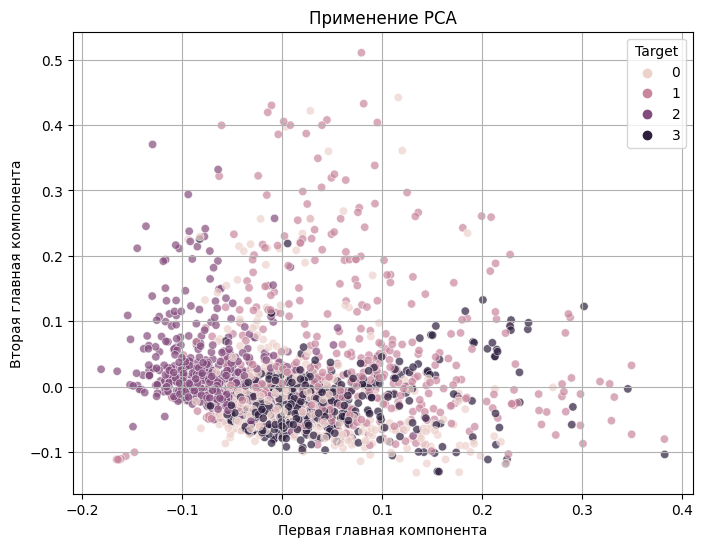

In [20]:
# визуализация результатов PCA
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(features.copy())
# X_pca_2.shape
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=df['Target'], alpha=0.7)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Применение PCA')
plt.grid(True)
plt.show()
# Наблюдаем слабое разделение классов. Можно сказать, что класс с меткой 2 отделен от остальных классов. 
# Остальные классы смешены в точке с координатами 0, 0

In [21]:
# Снижение размерности с применением алгоритма t-SNE
tsne = TSNE(n_components=3, random_state=42, init="random")
X_tsne = tsne.fit_transform(features)
X_tsne.shape

X_train, X_test, y_train, y_test = train_test_split(X_tsne, df['Target'], train_size=0.8, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# model = RandomForestClassifier(n_estimators = 50, max_depth=6, min_samples_split=2, min_samples_leaf=2, n_jobs=-1)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f'train f1_score: {f1_score(y_train, y_train_pred, average="macro" )}')
print(f'test  f1_score: {f1_score(y_test, y_test_pred, average="macro")}')

# Как выяснилось опытным путем:
# - стандартные варианты настройки init="pca" не может быть прменен к разреженной матрице, которую мы получил в результате векторизации
# - параметр n_components=3 может иметь значение не более чем 3. Поэтому полноценного сравнения с предыдущим экспериментом, где размерность была снижена до 15 признаков не получится.
# Наблюдаем существенное ухудшение метрик на тренировочной и тестовой выборке по сравнению с алгоритмом PCA
# Возможные причины:
# - количество признаков получившегося датасета по алгоритму t-SNE передают меньшую информацию по сравнению с датасетом, полученным по алгоритму PCA
# - изначально алгоритм t-SNE предназначен для снижения размерности в целях визуализации.


(1844, 3) (461, 3) (1844,) (461,)
train f1_score: 0.6491779908158606
test  f1_score: 0.5402642445791082


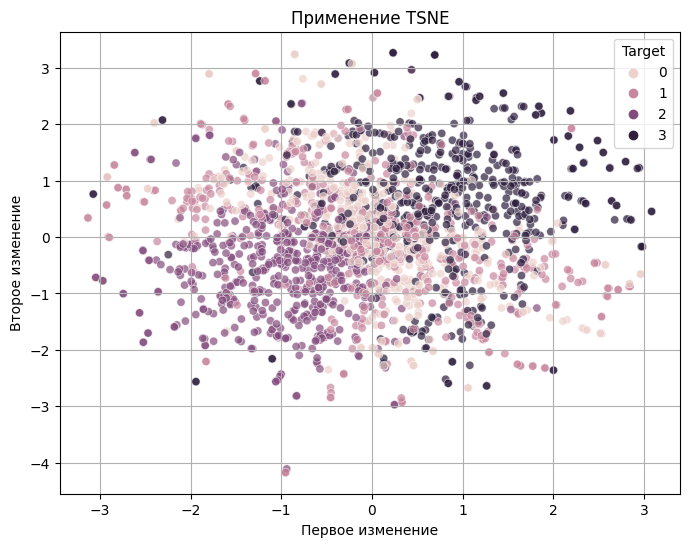

In [22]:
# визуализация результатов t-SNE

# scaler_quantile = QuantileTransformer() 
# Провел эксперимент с масштабированием признаков: визуализация получилось хуже

tsne_2 = TSNE(n_components=2, random_state=42, init="random")
X_tsne_2 = tsne_2.fit_transform(features.copy())
# X_tsne_2 = tsne_2.fit_transform(scaler_quantile.fit_transform(features.copy()))
# X_pca_2.shape
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne_2[:, 0], y=X_tsne_2[:, 1], hue=df['Target'], alpha=0.7)
plt.xlabel('Первое изменение')
plt.ylabel('Второе изменение')
plt.title('Применение TSNE')
plt.grid(True)
plt.show()
# Наблюдаем разделение чуть лучше, чем при использовании алгоритма PCA. Можно сказать, что классы с меткой 2, 3 хорошо отделены, классы с метками 0, 1 сконцентированы
# в точке с координатами 0,0 и разделены слабо.

In [23]:
# попробуем построить трехмерную визуализацию
from  mpl_toolkits import mplot3d

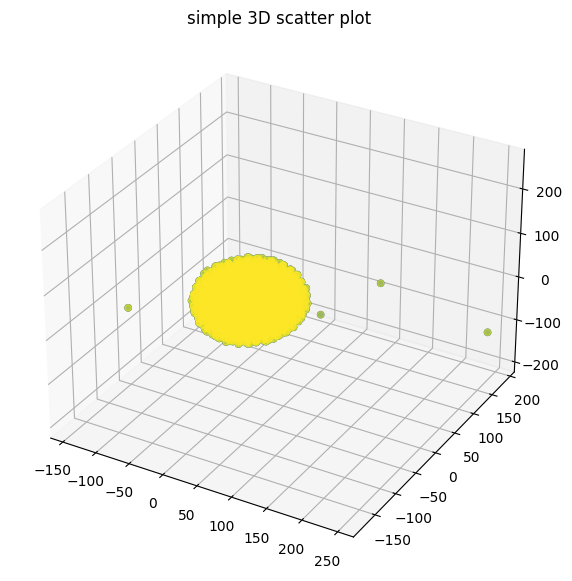

In [24]:
unique_groups = df['Target'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))
color_dict = dict(zip(unique_groups, colors))

# Создаем массив цветов для каждой точки в tsne_results
point_colors = [color_dict[age] for age in df['Target']]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
for group, color in color_dict.items():
    idx = df['Target'] == group
    # ax.scatter(tsne_results[idx, 0], tsne_results[idx, 1], c=[color], label=group)
    ax.scatter3D(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c =[color])

# # Creating plot
# ax.scatter3D(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c =[point_colors])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()
# На трехмерной диаграмме все слилось

In [25]:
# Снижение размерности с применением алгоритма UMAP
# pip install umap-learn
from umap import UMAP


In [26]:
umap_model = UMAP(n_components=dimension, random_state=42)
X_umap = umap_model.fit_transform(features.copy())
print(X_umap.shape)

X_train, X_test, y_train, y_test = train_test_split(X_umap, df['Target'], train_size=0.8, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# model = RandomForestClassifier(n_estimators = 50, max_depth=6, min_samples_split=2, min_samples_leaf=2, n_jobs=-1)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f'train f1_score: {f1_score(y_train, y_train_pred, average="macro" )}')
print(f'test  f1_score: {f1_score(y_test, y_test_pred, average="macro")}')
# Наблюдаем существенное ухудшение метрик на тренировочной и тестовой выборке по сравнению с алгоритмом t-SNE, и PCA
# Наблюдается очень сильное переобучение.
# Возможные причины:
# - изначально алгоритм UMAP предназначен для снижения размерности в целях визуализации.


c:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(2305, 15)
(1844, 15) (461, 15) (1844,) (461,)
train f1_score: 0.6055725958150656
test  f1_score: 0.29636133409785936


In [27]:
from sklearn.preprocessing import QuantileTransformer

c:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


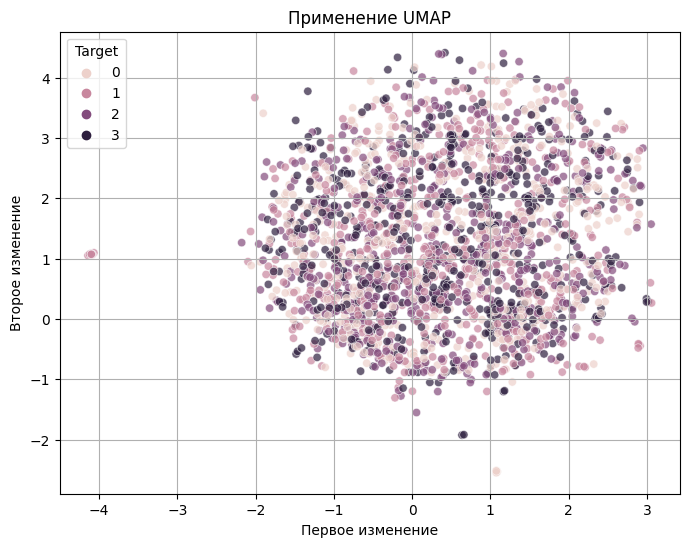

In [28]:
# визуализация результатов t-SNE
scaler_quantile = QuantileTransformer()
# scaler_quantile.fit_transform(features.copy())
umap_model_2 = UMAP(n_components=2, random_state=42)
X_umap_2 = umap_model_2.fit_transform(scaler_quantile.fit_transform(features.copy()))
# X_pca_2.shape
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap_2[:, 0], y=X_umap_2[:, 1], hue=df['Target'], alpha=0.7)
plt.xlabel('Первое изменение')
plt.ylabel('Второе изменение')
plt.title('Применение UMAP')
plt.grid(True)
plt.show()
# Наблюдаем разделение чуть лучше, чем при использовании алгоритма PCA. Можно сказать, что классы с меткой 2, 3 хорошо отделены, классы с метками 0, 1 сконцентированы
# в точке с координатами 0,0 и разделены слабо.

In [30]:
# Попробуем визуализировть данные с использованием рендера UMAP, как написано здесь: https://habr.com/ru/companies/skillfactory/articles/580154/
# pip install umap-learn[plot]
import umap.plot

c:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
c:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once

c:\Users\Alex\My Documents\gb\Python_2022\.python_b_hw\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


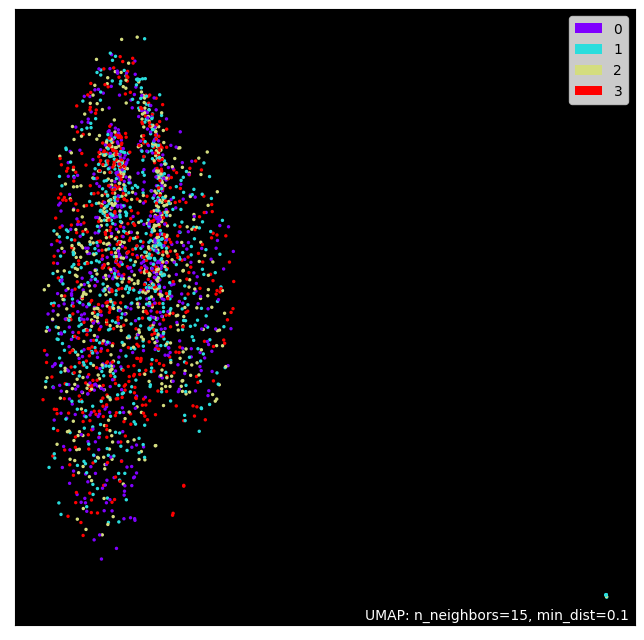

In [38]:
umap.plot.points(UMAP(random_state=42, n_neighbors=15, min_dist=0.1).fit(features.copy()), labels=df['Target'], theme="fire");
# результат получился на сильно лучше. Попробовал подбор гиперпараметров, улучшить разделение не получатеся.

4. После понижения размерности данных используйте любой метод машинного обучения для классификации новостей по темам.  

5. Сравните качество классификации для каждого метода понижения размерности. Используйте метрики точности и F1-меру.  

6. Визуализируйте двумерное представление данных для каждого метода понижения размерности, чтобы оценить, как алгоритмы справляются с сепарацией классов.  

In [40]:
# Задания 4, 5, 6 были сделаны сразу с применением алгоритма уменьшения размерности.
# Выводы сделаны  по ходу экспериментов.


7. Напишите отчёт, в котором обсудите, какой метод понижения размерности оказал наиболее значительное влияние на качество классификации и почему.

In [ ]:
# Самые лучши метрики у алгоритма PCA. Самые худшие у алгоритма UMAP
# Гипотеза:
# - t-SNE, UMAP изначально созданы для визуализции, а не для подготовки данных для работы моделей.
# - При снижении размерности до 15 признаков алгоритмами PCA и UMAP и снижении размерности до 3-х признаков алгоритмом t-SNE 
# алгоритм PCA сохраняет большее количество первоначальной информации.
# 
# Самая наглядная визуализация у алгоритма t-SNE
# Гипотеза - алгоритм t-SNE при снижении размерности до 2-х признаков сохраняет наибольшее количество информации.